# quant-econ Solutions: Estimation of Spectra

Solutions for http://quant-econ.net/jl/estspec.html

In [1]:
using QuantEcon
using Plots
pyplot()

srand(42)  # reproducible results

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[964434469,1073036706,1860149520,1073503458,1687169063,1073083486,-399267803,1072983952,-909620556,1072836235  …  -293054293,1073002412,-1300127419,1073642642,1917177374,-666058738,-337596527,1830741494,382,32700]),[6.93909e-310,NaN,2.14224e-314,2.14224e-314,2.14224e-314,2.14224e-314,6.93909e-310,6.93909e-310,6.93909e-310,NaN  …  4.94066e-324,2.96439e-323,0.0,6.93909e-310,6.93909e-310,6.93909e-310,4.94066e-324,6.93909e-310,0.0,0.0],382,UInt32[0x0000002a])

## Exercise 1

In [2]:
n = 400
phi = 0.5
theta = [0, -0.8]
sigma = 1.0
lp = ARMA(phi, theta, 1.0)
X = simulation(lp, ts_length=n)

xs = []
x_sds = []
x_sms = []
ys = []
y_sds = []
y_sms = []
titles = []

for (i, wl) in enumerate([15, 55, 175])  # window lengths
    x, y = periodogram(X)
    push!(xs, x)
    push!(ys, y)

    x_sd, y_sd = spectral_density(lp, two_pi=false, res=120)
    push!(x_sds, x_sd)
    push!(y_sds, y_sd)

    x, y_smoothed = periodogram(X, "hamming", wl)
    push!(x_sms, x)
    push!(y_sms, y_smoothed)

    t = "window length = $wl"
    push!(titles, t)
end


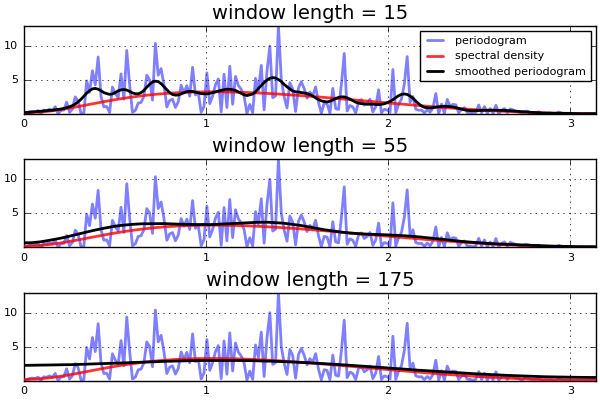

In [4]:
plot(xs, ys, layout=(3,1), color=:blue, alpha=0.5, linewidth=2, label=["periodogram" "" ""])
plot!(x_sds, y_sds, layout=(3,1), color=:red, alpha=0.8, linewidth=2, label=["spectral density" "" ""])
plot!(x_sms, y_sms, layout=(3,1), color=:black, linewidth=2, label=["smoothed periodogram" "" ""])
plot!(title=titles')

## Exercise 2